#### Project 1: Used car pricing prediction
BI名企班 谢雅楠

In [1]:
import pandas as pd
import numpy as np

In [2]:
## Load training data
train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('used_car_testB_20200421.csv', sep=' ')
print('shape of train data: ', train_data.shape)
print('shape of test data: ', test_data.shape)

test_data.head()

shape of train data:  (150000, 31)
shape of test data:  (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [3]:
## Feature: regDate (diff)

# to datetime
# temp = pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')
# min_date = pd.to_datetime('19910101', format='%Y%m%d')
# train_data['regDate']
min_date = pd.to_datetime('19910101', format='%Y%m%d')
train_data['regTime'] = (pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days

test_data['regTime'] = (pd.to_datetime(test_data['regDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days

In [4]:
## Feature: creatDate (diff)
train_data['creatTime'] = (pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days
test_data['creatTime'] = (pd.to_datetime(test_data['creatDate'], format='%Y%m%d', errors='coerce') - min_date).dt.days

In [5]:
## create Feature: use time
train_data['useTime'] = train_data['creatTime'] - train_data['regTime']
test_data['useTime'] = test_data['creatTime'] - test_data['regTime']

In [6]:
## Feature: notRepairedDamage

train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
test_data['notRepairedDamage'].replace('-', '0.0', inplace=True)

train_data['notRepairedDamage'] = train_data['notRepairedDamage'].astype('float64')
test_data['notRepairedDamage'] = test_data['notRepairedDamage'].astype('float64')

In [7]:
## Feature: power
train_data['power'][train_data['power'] > 600] = 600
test_data['power'][test_data['power'] > 600] = 600


<ipython-input-7-c5f414a3cd8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['power'][train_data['power'] > 600] = 600
<ipython-input-7-c5f414a3cd8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['power'][test_data['power'] > 600] = 600


In [8]:
## missing values
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)


In [10]:
## normalisation
from sklearn.preprocessing import MinMaxScaler

features = train_data.columns.to_list()
features.remove('SaleID')
features.remove('price')

min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(train_data[features].values)
X_test = min_max_scaler.transform(test_data[features].values)
y = train_data['price'].values

In [11]:
## train test split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [12]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=[len(features)]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer='Adam')

In [13]:
## train model
model.fit(train_x, train_y, batch_size=1024, epochs=200)

Epoch 1/200
118/118 [==============================] - 1s 6ms/step - loss: 4869.2910
Epoch 2/200
118/118 [==============================] - 1s 6ms/step - loss: 2537.9490
Epoch 3/200
118/118 [==============================] - 1s 6ms/step - loss: 1318.5740
Epoch 4/200
118/118 [==============================] - 1s 6ms/step - loss: 1112.1382
Epoch 5/200
118/118 [==============================] - 1s 6ms/step - loss: 1004.5864
Epoch 6/200
118/118 [==============================] - 1s 6ms/step - loss: 932.5551
Epoch 7/200
118/118 [==============================] - 1s 6ms/step - loss: 878.1100
Epoch 8/200
118/118 [==============================] - 1s 6ms/step - loss: 835.7307
Epoch 9/200
118/118 [==============================] - 1s 6ms/step - loss: 797.7657
Epoch 10/200
118/118 [==============================] - 1s 6ms/step - loss: 766.6876
Epoch 11/200
118/118 [==============================] - 1s 6ms/step - loss: 738.8367
Epoch 12/200
118/118 [==============================] - 1s 6ms/step -

118/118 [==============================] - 1s 6ms/step - loss: 498.4572A: 0s - loss: 4
Epoch 98/200
118/118 [==============================] - 1s 6ms/step - loss: 495.4773
Epoch 99/200
118/118 [==============================] - 1s 6ms/step - loss: 497.9747
Epoch 100/200
118/118 [==============================] - 1s 6ms/step - loss: 494.7088
Epoch 101/200
118/118 [==============================] - 1s 6ms/step - loss: 496.8010
Epoch 102/200
118/118 [==============================] - 1s 6ms/step - loss: 492.3145
Epoch 103/200
118/118 [==============================] - 1s 6ms/step - loss: 492.0113
Epoch 104/200
118/118 [==============================] - 1s 6ms/step - loss: 492.9554
Epoch 105/200
118/118 [==============================] - 1s 6ms/step - loss: 492.5021
Epoch 106/200
118/118 [==============================] - 1s 6ms/step - loss: 493.8823
Epoch 107/200
118/118 [==============================] - 1s 6ms/step - loss: 491.6309
Epoch 108/200
118/118 [==============================] 

118/118 [==============================] - 1s 6ms/step - loss: 470.4724
Epoch 193/200
118/118 [==============================] - 1s 6ms/step - loss: 468.8910
Epoch 194/200
118/118 [==============================] - 1s 6ms/step - loss: 467.5351
Epoch 195/200
118/118 [==============================] - 1s 6ms/step - loss: 466.7396
Epoch 196/200
118/118 [==============================] - 1s 6ms/step - loss: 468.4959A: 0s - loss: 4
Epoch 197/200
118/118 [==============================] - 1s 6ms/step - loss: 466.2165
Epoch 198/200
118/118 [==============================] - 1s 6ms/step - loss: 466.7468
Epoch 199/200
118/118 [==============================] - 1s 7ms/step - loss: 471.6371
Epoch 200/200
118/118 [==============================] - 1s 6ms/step - loss: 467.8440


In [16]:
## model evaluation
from sklearn.metrics import mean_absolute_error
print('mae on traiing set:')
print(mean_absolute_error(train_y, model.predict(train_x)))

print('mae on test set:')
print(mean_absolute_error(test_y, model.predict(test_x)))

mae on traiing set:
464.2324438030044
mae on test set:
490.7464708829403


In [17]:
## train model on the whole dataset
model = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=[len(features)]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer='Adam')

model.fit(X, y, batch_size=1024, epochs=200)

Epoch 1/200
147/147 [==============================] - 1s 6ms/step - loss: 4619.0220
Epoch 2/200
147/147 [==============================] - 1s 6ms/step - loss: 1852.9513
Epoch 3/200
147/147 [==============================] - 1s 6ms/step - loss: 1156.3856
Epoch 4/200
147/147 [==============================] - 1s 6ms/step - loss: 1004.4111
Epoch 5/200
147/147 [==============================] - 1s 6ms/step - loss: 925.3806
Epoch 6/200
147/147 [==============================] - 1s 6ms/step - loss: 867.3788
Epoch 7/200
147/147 [==============================] - 1s 6ms/step - loss: 821.4096
Epoch 8/200
147/147 [==============================] - 1s 6ms/step - loss: 782.3778
Epoch 9/200
147/147 [==============================] - 1s 6ms/step - loss: 748.1078
Epoch 10/200
147/147 [==============================] - 1s 5ms/step - loss: 720.4575
Epoch 11/200
147/147 [==============================] - 1s 6ms/step - loss: 695.3391
Epoch 12/200
147/147 [==============================] - 1s 6ms/step - 

147/147 [==============================] - 1s 6ms/step - loss: 494.0754
Epoch 98/200
147/147 [==============================] - 1s 7ms/step - loss: 490.9633
Epoch 99/200
147/147 [==============================] - 1s 6ms/step - loss: 491.4862
Epoch 100/200
147/147 [==============================] - 1s 6ms/step - loss: 491.7781
Epoch 101/200
147/147 [==============================] - 1s 6ms/step - loss: 490.2071
Epoch 102/200
147/147 [==============================] - 1s 6ms/step - loss: 491.6117
Epoch 103/200
147/147 [==============================] - 1s 6ms/step - loss: 490.9981
Epoch 104/200
147/147 [==============================] - 1s 6ms/step - loss: 489.7716
Epoch 105/200
147/147 [==============================] - 1s 6ms/step - loss: 492.0987
Epoch 106/200
147/147 [==============================] - 1s 6ms/step - loss: 491.5781
Epoch 107/200
147/147 [==============================] - 1s 6ms/step - loss: 490.8366
Epoch 108/200
147/147 [==============================] - 1s 7ms/step -

147/147 [==============================] - 1s 6ms/step - loss: 467.3356
Epoch 193/200
147/147 [==============================] - 1s 6ms/step - loss: 466.1539
Epoch 194/200
147/147 [==============================] - 1s 6ms/step - loss: 465.8894
Epoch 195/200
147/147 [==============================] - 1s 6ms/step - loss: 464.1867
Epoch 196/200
147/147 [==============================] - 1s 6ms/step - loss: 465.1353
Epoch 197/200
147/147 [==============================] - 1s 6ms/step - loss: 466.7718
Epoch 198/200
147/147 [==============================] - 1s 6ms/step - loss: 464.8284
Epoch 199/200
147/147 [==============================] - 1s 6ms/step - loss: 464.4693
Epoch 200/200
147/147 [==============================] - 1s 7ms/step - loss: 466.1517


In [18]:
## prediction 
predict_y = model.predict(X_test)

result = pd.DataFrame()
result['SaleID'] = test_data['SaleID']
result['price'] = predict_y
result['price'][result['price'] < 11] = 11
result['price'][result['price'] > 99999] = 99999


result.to_csv('result_ans_nn.csv', index=False)

<ipython-input-18-d4213fb78c09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['price'][result['price'] < 11] = 11


score on tianchiplatform
![jupyter](./score.png)

#### Project 2: EDA on supply chain

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## load data
dataset = pd.read_csv('SupplyChain/SupplyChain.csv', encoding = 'unicode_escape')
dataset.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [25]:
## 1. shape
dataset.shape

(180519, 53)

In [27]:
## 2. missing value
dataset.isnull().sum()[dataset.isnull().sum()>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [28]:
# first + last name
dataset['Customer Full Name'] = dataset['Customer Lname'] + dataset['Customer Fname']

In [29]:
# customer zipcode
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)

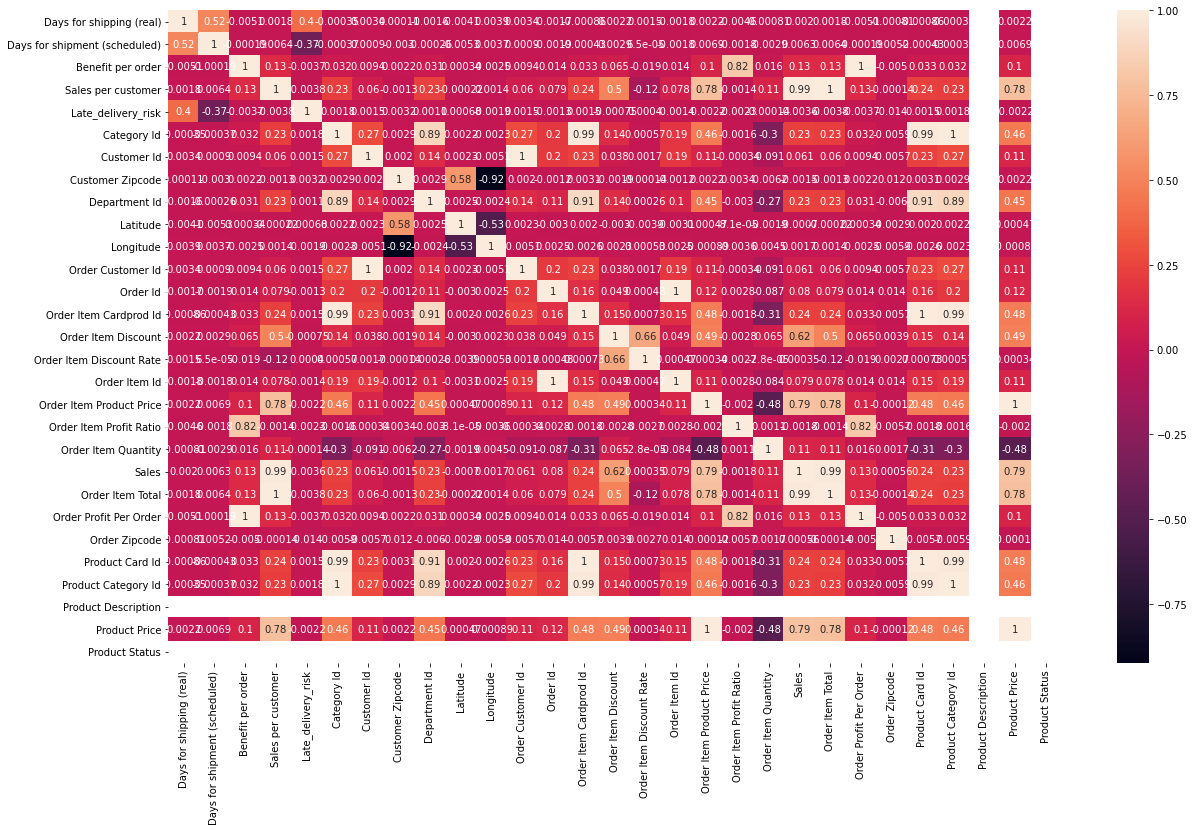

In [32]:
## 3. correlation
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr(), annot=True)

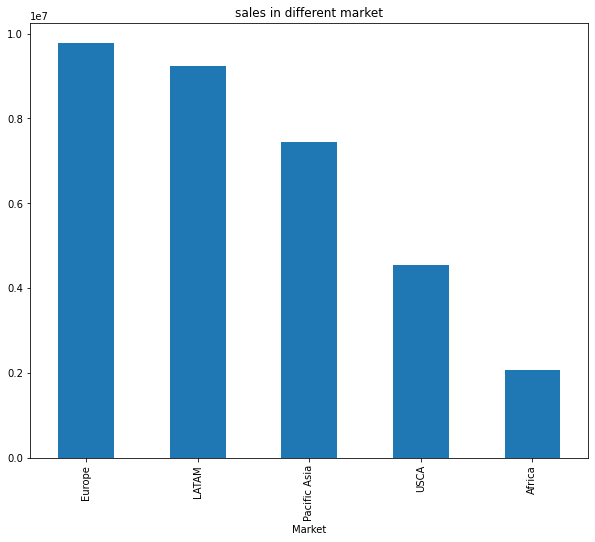

In [35]:
## 4. Market \ Order Region
# market
market = dataset.groupby(by="Market")
sales_by_market = market['Sales per customer'].sum().sort_values(ascending=False)
sales_by_market.plot.bar(figsize=(10,8), title='sales in different market')

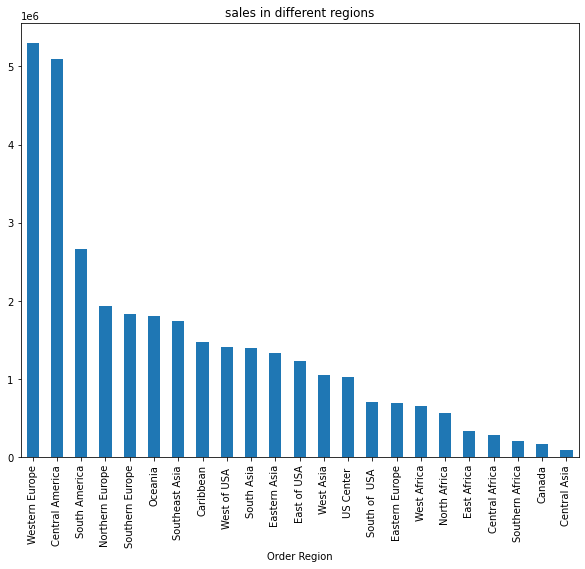

In [36]:
# order region
region = dataset.groupby(by='Order Region')
sales_by_orderregion = region['Sales per customer'].sum().sort_values(ascending=False)
sales_by_orderregion.plot.bar(figsize=(10,8), title='sales in different regions')

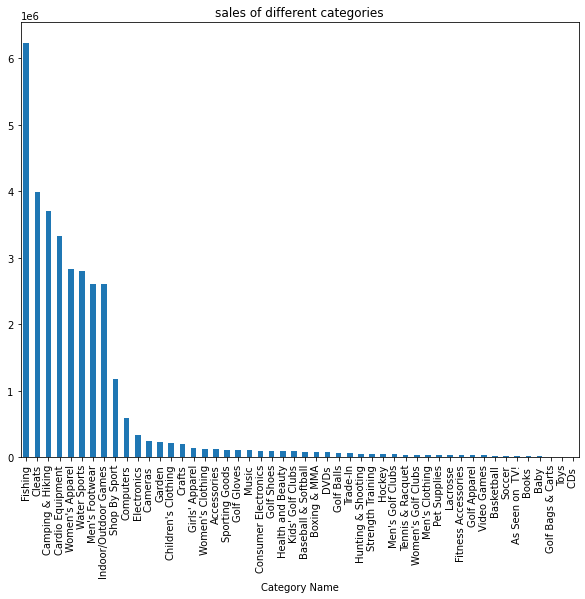

In [38]:
## 5. Category
cat = dataset.groupby(by='Category Name')
sales_by_cat = cat['Sales per customer'].sum().sort_values(ascending=False)
sales_by_cat.plot.bar(figsize=(10,8), title='sales of different categories')

In [45]:
## 6. Time series
# create timestamp
temp = pd.DatetimeIndex(dataset['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [46]:
# year month weekday hour

dataset['order_year'] = temp.year
dataset['order_month'] = temp.month
dataset['order_week_day'] = temp.weekday
dataset['order_hour'] = temp.hour
dataset['order_month_year'] = temp.to_period('M')


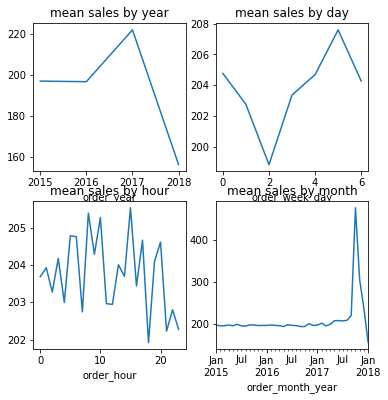

In [57]:
plt.figure()

plt.subplot(2,2,1)
df_year = dataset.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(6,6), title='mean sales by year')

plt.subplot(2,2,2)
df_day = dataset.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(6,6), title='mean sales by day')

plt.subplot(2,2,3)
df_hour = dataset.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(6,6), title='mean sales by hour')

plt.subplot(2,2,4)s
df_month = dataset.groupby('order_month_year')
df_month['Sales'].mean().plot(figsize=(6,6), title='mean sales by month')